In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt
from cellrank.estimators import GPCCA


In [3]:
adata = sc.read_h5ad('adata_leiden.h5ad')

In [4]:
adata_asc = adata[adata.obs.derive == 'ASC']
adata_fsc = adata[adata.obs.derive == 'FSC']
adata_psc = adata[adata.obs.derive == 'IPS']

In [5]:
sc.pp.neighbors(adata_asc)
sc.pp.neighbors(adata_fsc)
sc.pp.neighbors(adata_psc, n_neighbors=10)

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


         Falling back to preprocessing with `sc.pp.pca` and default params.
         Falling back to preprocessing with `sc.pp.pca` and default params.


In [6]:
sc.tl.diffmap(adata_asc)
sc.tl.diffmap(adata_fsc)
sc.tl.diffmap(adata_psc)

In [ ]:
cell_type_colors = {
    'basal cells': '#16f648',
    'club cells': '#795548',
    'ciliated cells': '#1c15bc',
    'alveolar type 1 (AT1) cells': '#85C1E9',
    'alveolar type 2 (AT2) cells': '#f1f847',
    'neuroendocrine cells': '#8F4646',
    'airway secretory cells': '#a8bade',
    'goblet cells': '#8e3101',
    'stem cells': '#225805'
}

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterp

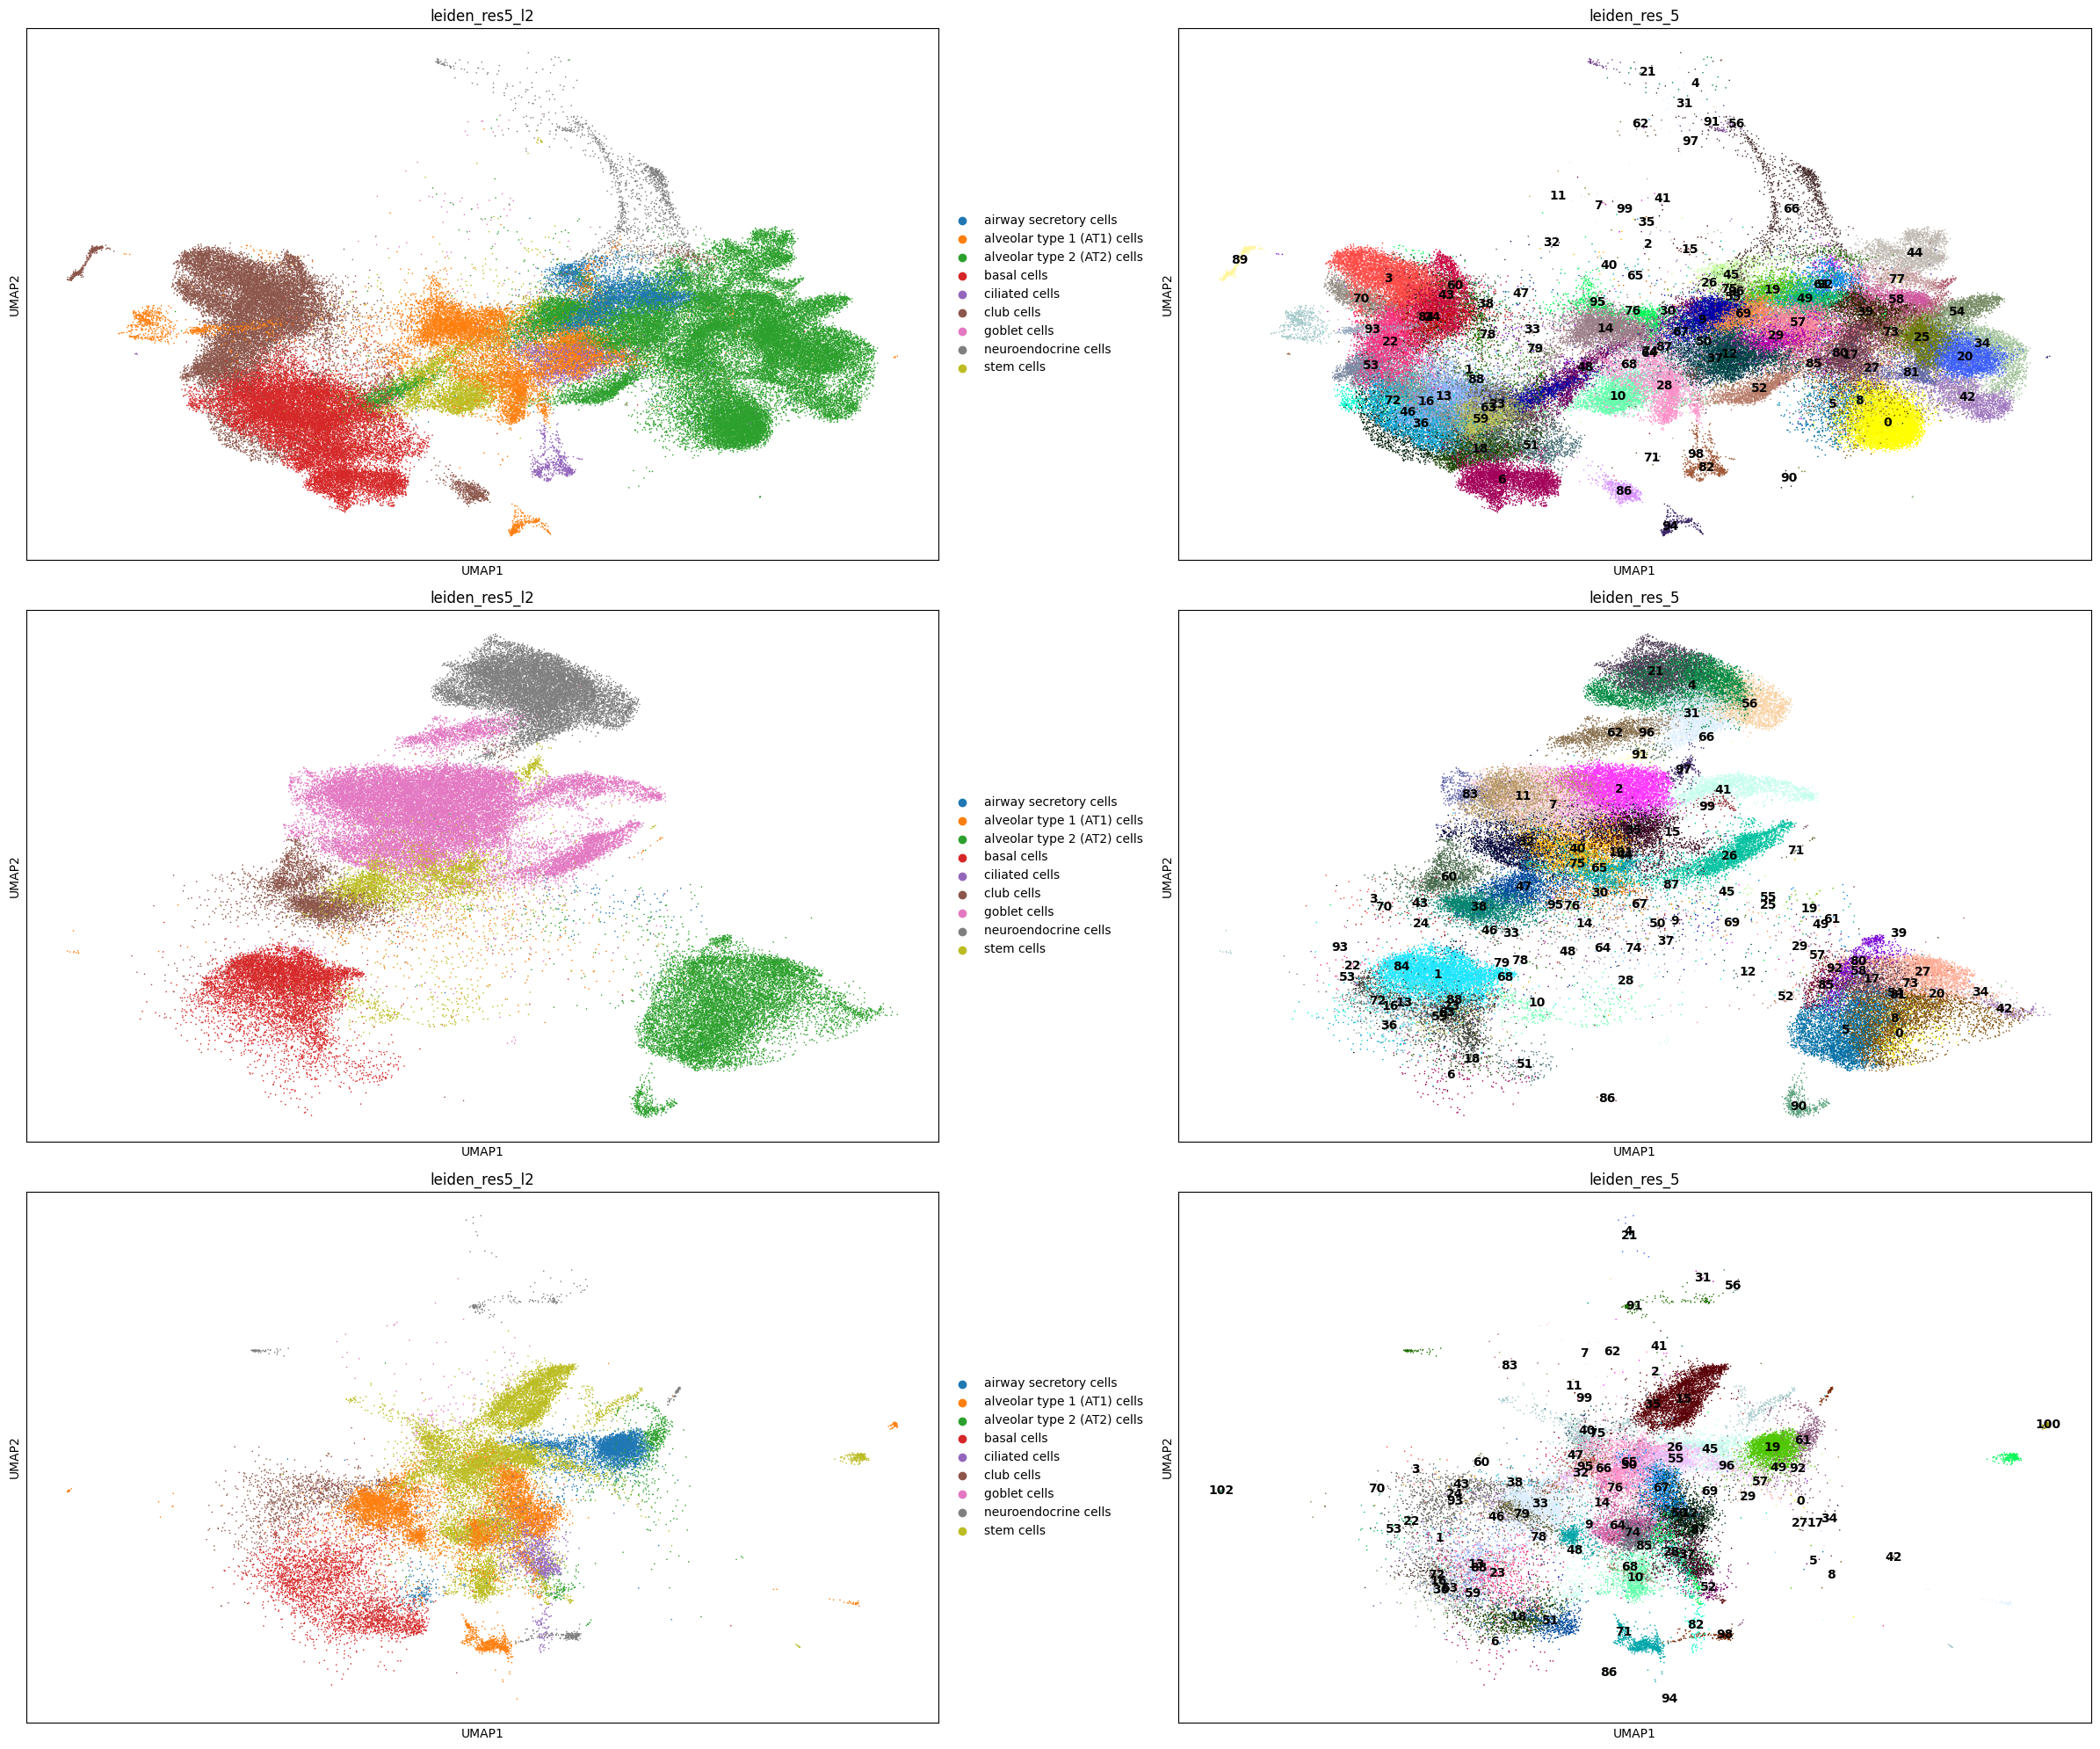

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(24, 20))
sc.pl.umap(adata_asc, color='leiden_res5_l2',show=False, ax= ax1, size=5,)
sc.pl.umap(adata_asc, color='leiden_res_5',show=False, ax=ax2,size=5,legend_loc='on data')
sc.pl.umap(adata_fsc, color='leiden_res5_l2', show=False,ax=ax3,size=5,)
sc.pl.umap(adata_fsc, color='leiden_res_5', show=False,ax=ax4,size=5,legend_loc='on data')
sc.pl.umap(adata_psc, color='leiden_res5_l2',show=False, ax= ax5,size=5,)
sc.pl.umap(adata_psc, color='leiden_res_5',show=False, ax=ax6,size=5,legend_loc='on data')
plt.tight_layout() 
plt.show()

In [ ]:
asc_root_adata = adata[adata.obs.leiden_res_5 == '10']
fsc_root_adata = adata[adata.obs.leiden_res_5 == '47']
psc_root_adata = adata[adata.obs.leiden_res_5 == '64']

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'leiden_res_5'}, xlabel='UMAP1', ylabel='UMAP2'>

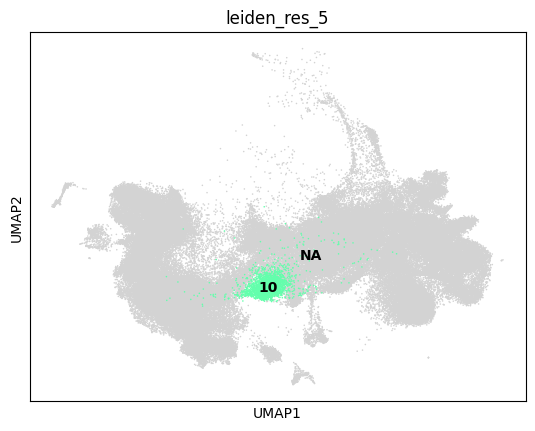

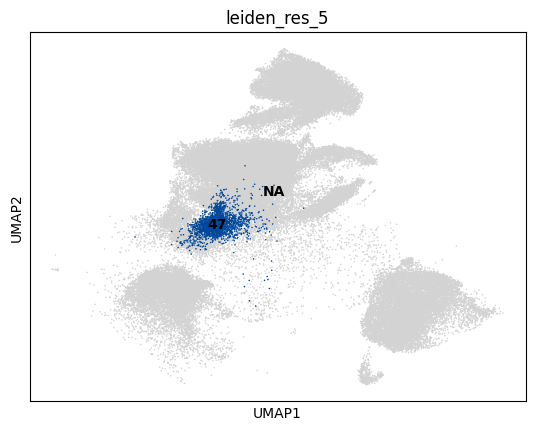

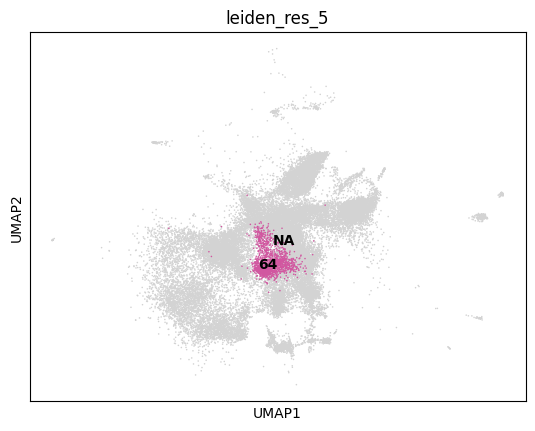

In [13]:
sc.pl.umap(adata_asc, color='leiden_res_5',show=False, groups=['10'],size=5,legend_loc='on data')
sc.pl.umap(adata_fsc, color='leiden_res_5',show=False, groups=['47'],size=5,legend_loc='on data')
sc.pl.umap(adata_psc, color='leiden_res_5',show=False, groups=['64'],size=5,legend_loc='on data')

In [ ]:
root_cell_asc = sc.pp.subsample(asc_root_adata, n_obs=1,copy=True)
root_cell_fsc = sc.pp.subsample(fsc_root_adata, n_obs=1,copy=True)
root_cell_psc = sc.pp.subsample(psc_root_adata, n_obs=1,copy=True)

In [ ]:
adata_asc.obs['Root_Cell'] = 0
adata_psc.obs['Root_Cell'] = 0
adata_fsc.obs['Root_Cell'] = 0

In [ ]:
adata_asc.obs.loc[root_cell_asc.obs.index, 'Root_Cell'] = 1 
adata_fsc.obs.loc[root_cell_fsc.obs.index, 'Root_Cell'] = 1 
adata_psc.obs.loc[root_cell_psc.obs.index, 'Root_Cell'] = 1 

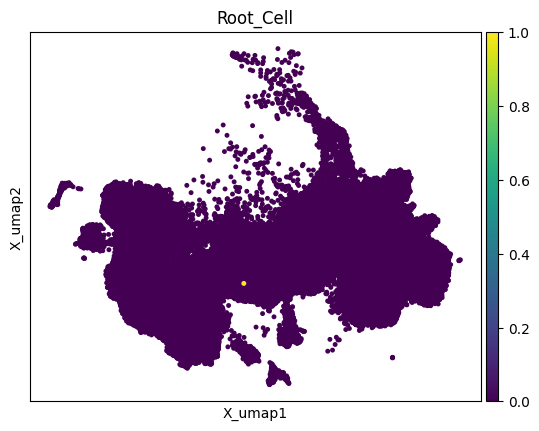

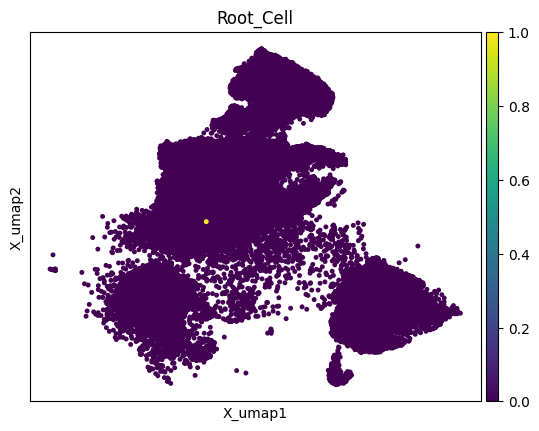

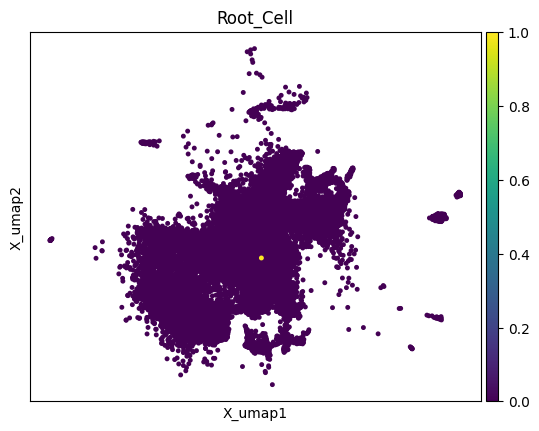

In [17]:
sc.pl.embedding(adata_asc, basis='X_umap', color='Root_Cell', s=50)
sc.pl.embedding(adata_fsc, basis='X_umap', color='Root_Cell', s=50)
sc.pl.embedding(adata_psc, basis='X_umap', color='Root_Cell', s=50)

In [ ]:
adata_asc.obs.reset_index(inplace=True)
adata_fsc.obs.reset_index(inplace=True)
adata_psc.obs.reset_index(inplace=True)

In [ ]:
root_cell_index_asc = np.flatnonzero(adata_asc.obs['Root_Cell'] == 1)[0]
root_cell_index_fsc = np.flatnonzero(adata_fsc.obs['Root_Cell'] == 1)[0]
root_cell_index_psc = np.flatnonzero(adata_psc.obs['Root_Cell'] == 1)[0]

In [ ]:
adata_asc.uns['iroot'] = root_cell_index_asc
adata_fsc.uns['iroot'] = root_cell_index_fsc
adata_psc.uns['iroot'] = root_cell_index_psc

In [ ]:
sc.tl.dpt(adata_asc)
sc.tl.dpt(adata_fsc)
sc.tl.dpt(adata_psc)

In [ ]:
pk_asc = cr.kernels.PseudotimeKernel(adata_asc, time_key='dpt_pseudotime')
pk_fsc = cr.kernels.PseudotimeKernel(adata_fsc, time_key='dpt_pseudotime')
pk_psc = cr.kernels.PseudotimeKernel(adata_psc, time_key='dpt_pseudotime')

In [ ]:
pk_asc.compute_transition_matrix()
pk_fsc.compute_transition_matrix()
pk_psc.compute_transition_matrix()

100%|██████████| 34002/34002 [00:03<00:00, 10848.10cell/s]


PseudotimeKernel[n=34002, dnorm=False, scheme='hard', frac_to_keep=0.3]

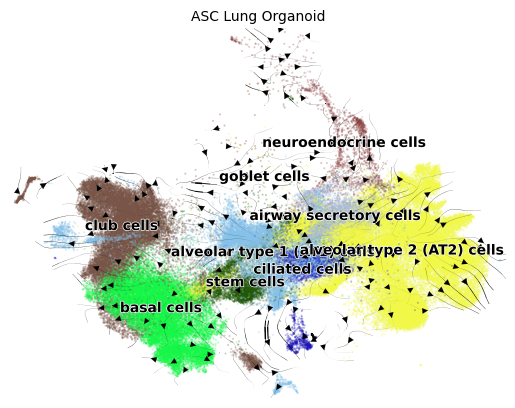

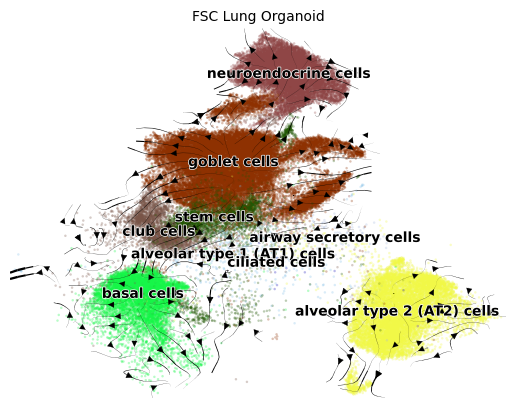

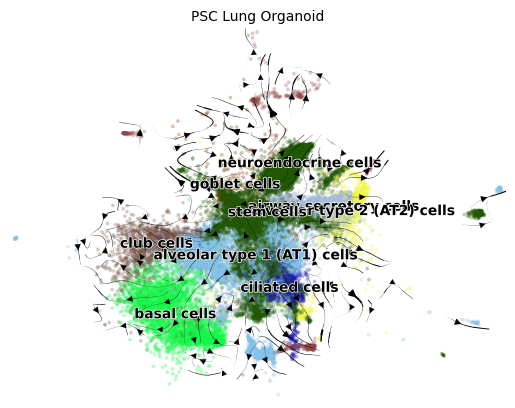

In [24]:
pk_asc.plot_projection(basis='X_umap', color='leiden_res5_l3', title='ASC Lung Organoid', palette=cell_type_colors)
pk_fsc.plot_projection(basis='X_umap', color='leiden_res5_l3', title='FSC Lung Organoid', palette=cell_type_colors)
pk_psc.plot_projection(basis='X_umap', color='leiden_res5_l3', title='PSC Lung Organoid', palette=cell_type_colors)

In [ ]:
from cellrank.estimators import GPCCA

g_asc = GPCCA(pk_asc)
g_fsc = GPCCA(pk_fsc)
g_psc = GPCCA(pk_psc)

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
g_asc.fit(n_states=10, cluster_key='leiden_res5_l3', method='krylov')
g_fsc.fit(n_states=10, cluster_key='leiden_res5_l3', method='krylov')

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/pygpcca/_gpcca.py:1274: UserWarning: Stationary distribution couldn't be calculated. Reason: Top eigenvector has imaginary component..
  warnings.warn(f"Stationary distribution couldn't be calculated. Reason: {e}.")


GPCCA[kernel=PseudotimeKernel[n=75352], initial_states=None, terminal_states=None]

In [ ]:
g_psc.fit(n_states=10, cluster_key='leiden_res5_l3', method='krylov')

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/pygpcca/_gpcca.py:1274: UserWarning: Stationary distribution couldn't be calculated. Reason: Top eigenvector has both positive and negative entries. It has range = [-0.5806559696277297, 3.5990248526026094e-09].
  warnings.warn(f"Stationary distribution couldn't be calculated. Reason: {e}.")


GPCCA[kernel=PseudotimeKernel[n=34002], initial_states=None, terminal_states=None]

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


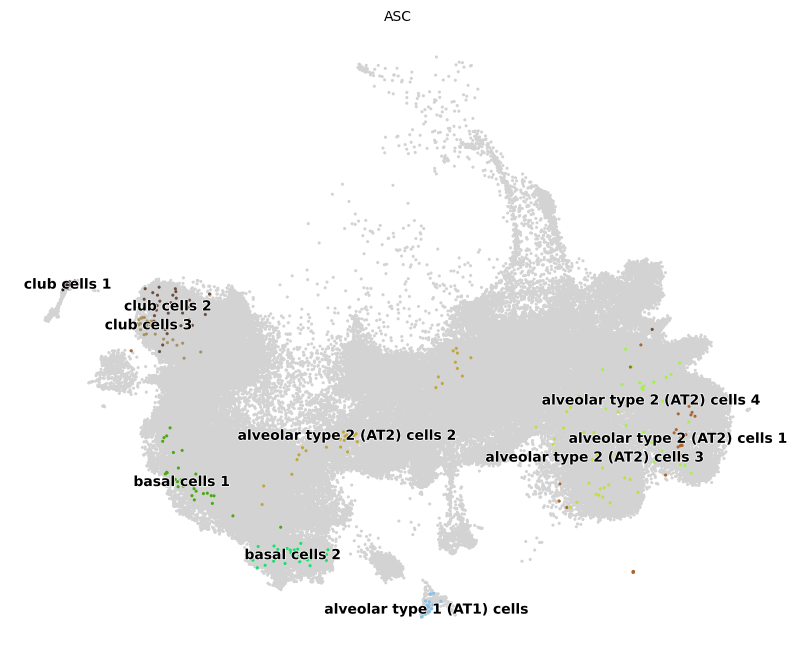

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


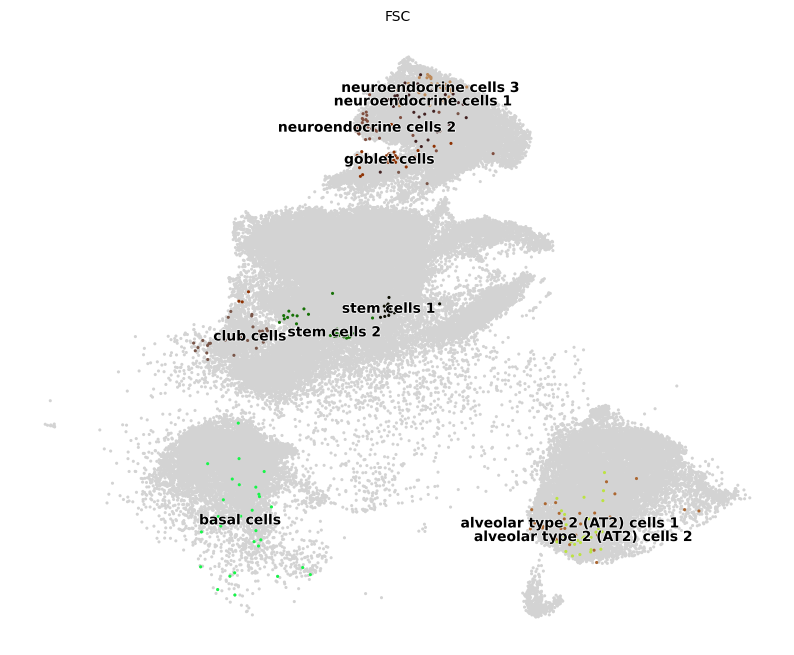

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


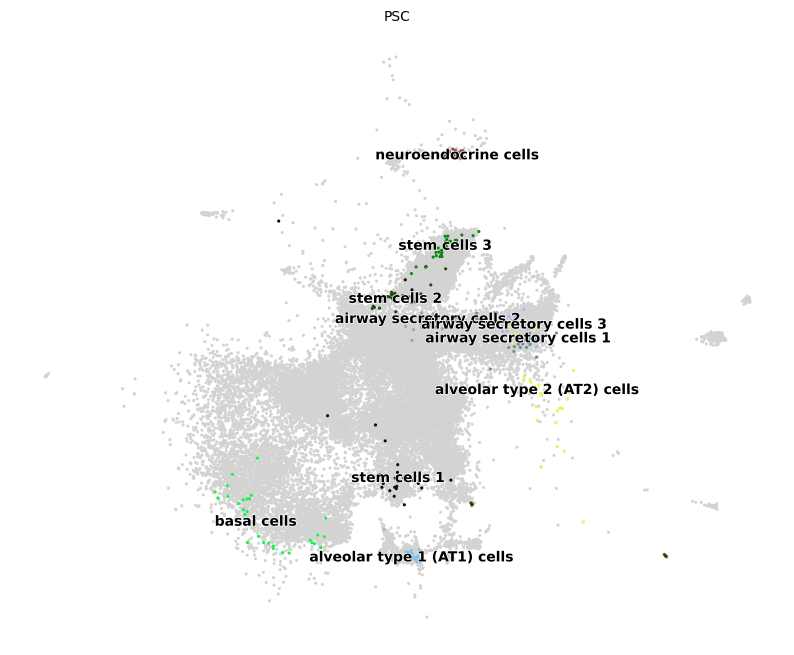

In [53]:
plt.rcParams['figure.figsize'] = (10, 8)
g_asc.plot_macrostates(which="all", cmap='viridis', size=20, title='ASC')
g_fsc.plot_macrostates(which="all", cmap='viridis', size=20, title='FSC')
g_psc.plot_macrostates(which="all", cmap='viridis', size=20, title='PSC')

In [65]:
g_asc.set_terminal_states(states=['alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells_1', 'alveolar type 2 (AT2) cells_3','basal cells_2','club cells_2',])
g_fsc.set_terminal_states(states=['alveolar type 2 (AT2) cells_2', 'club cells', 'basal cells','goblet cells', 'neuroendocrine cells_3',])
g_psc.set_terminal_states(states=['airway secretory cells_2', 'airway secretory cells_3','alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells', 'neuroendocrine cells','stem cells_3' ])

GPCCA[kernel=PseudotimeKernel[n=34002], initial_states=None, terminal_states=['airway secretory cells_2', 'airway secretory cells_3', 'alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells', 'neuroendocrine cells', 'stem cells_3']]

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


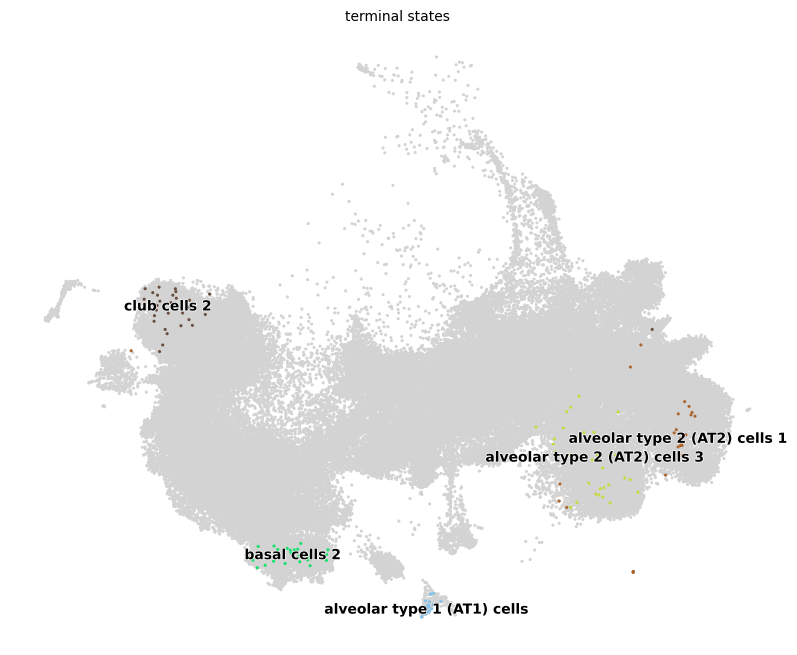

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


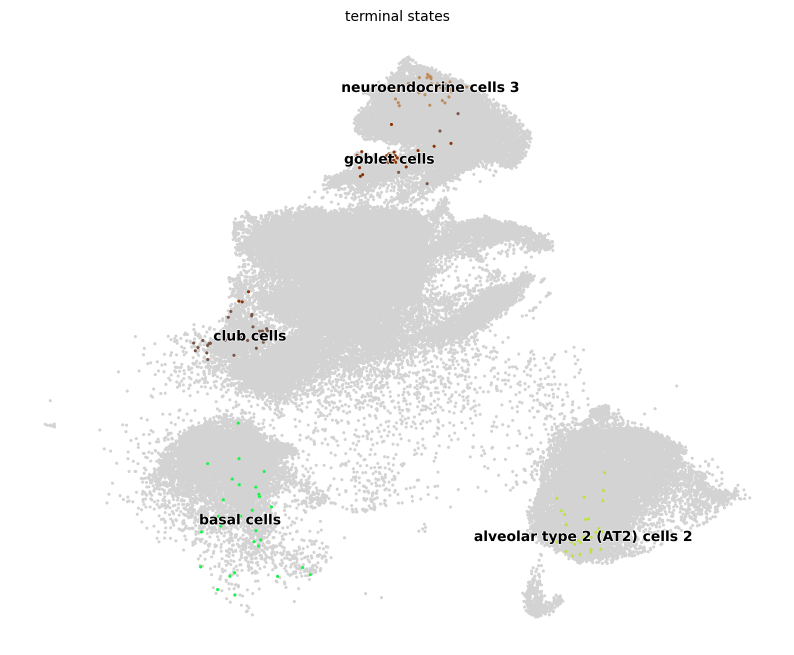

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


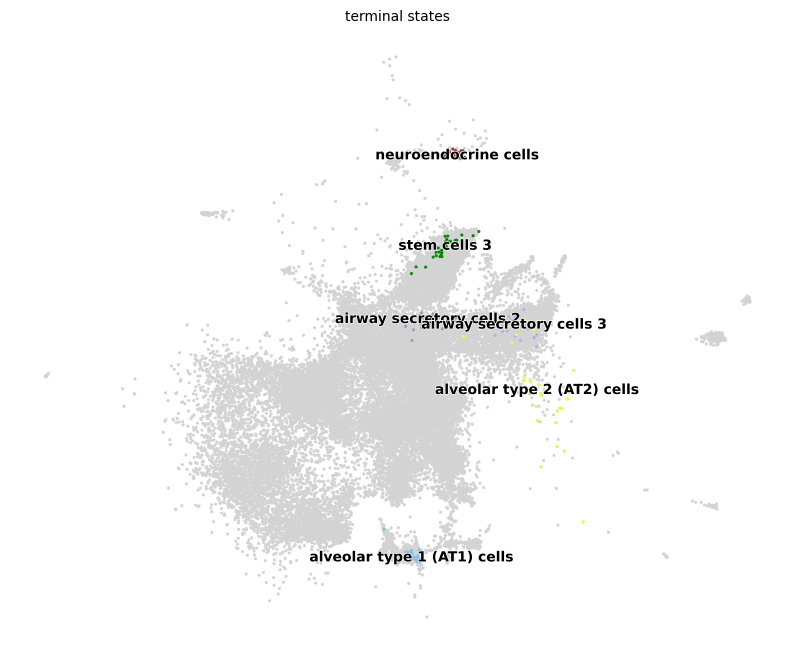

In [66]:
g_asc.plot_macrostates(which="terminal", size=20)
g_fsc.plot_macrostates(which="terminal", size=20)
g_psc.plot_macrostates(which="terminal", size=20)

In [69]:
g_asc.write('g_asc.h5ad', write_adata=True)
g_fsc.write('g_fsc.h5ad', write_adata=True)
g_psc.write('g_psc.h5ad', write_adata=True)

Writing `GPCCA[kernel=PseudotimeKernel[n=116133], initial_states=None, terminal_states=['alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells_1', 'alveolar type 2 (AT2) cells_3', 'basal cells_2', 'club cells_2']]` to `g_asc.h5ad`
Writing `GPCCA[kernel=PseudotimeKernel[n=75352], initial_states=None, terminal_states=['alveolar type 2 (AT2) cells_2', 'basal cells', 'club cells', 'goblet cells', 'neuroendocrine cells_3']]` to `g_fsc.h5ad`
Writing `GPCCA[kernel=PseudotimeKernel[n=34002], initial_states=None, terminal_states=['airway secretory cells_2', 'airway secretory cells_3', 'alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells', 'neuroendocrine cells', 'stem cells_3']]` to `g_psc.h5ad`


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt
from cellrank.estimators import GPCCA

In [2]:
g_asc = cr.estimators.GPCCA.read('g_asc.h5ad')
g_fsc = cr.estimators.GPCCA.read('g_fsc.h5ad')
g_psc = cr.estimators.GPCCA.read('g_psc.h5ad')

In [3]:
cr.settings.verbosity = 2
g_asc.compute_fate_probabilities(tol=0.999, preconditioner='ilu')
g_fsc.compute_fate_probabilities(tol=0.999, preconditioner='ilu')
g_psc.compute_fate_probabilities(tol=0.999, preconditioner='ilu')

Computing fate probabilities


100%|██████████| 5/5 [00:01<00:00,  3.89/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:01)
Computing fate probabilities



100%|██████████| 5/5 [00:00<00:00, 16.45/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)
Computing fate probabilities



100%|██████████| 6/6 [00:00<00:00, 61.43/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


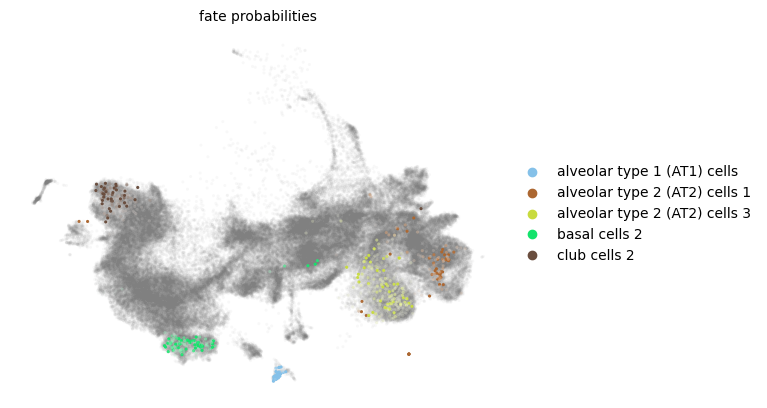

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


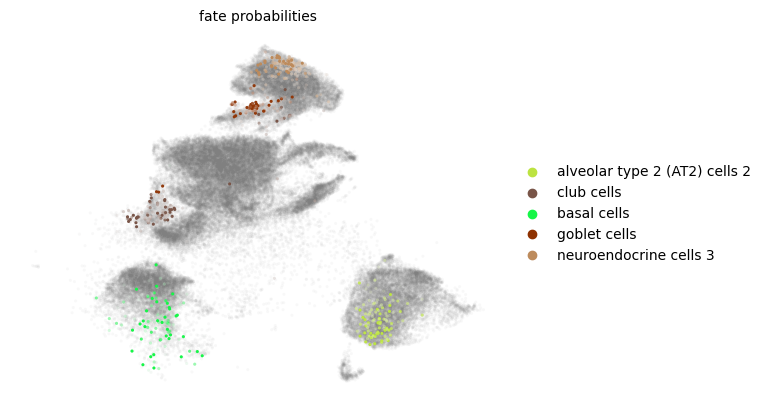

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


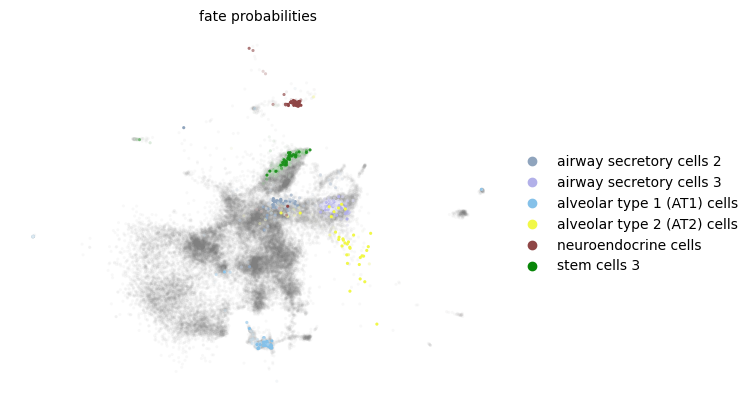

In [6]:
g_asc.plot_fate_probabilities(legend_loc="right",size=20)
g_fsc.plot_fate_probabilities(legend_loc="right",size=20)
g_psc.plot_fate_probabilities(legend_loc="right",size=20)

In [4]:
selected_cells_asc =['alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells_1', 'alveolar type 2 (AT2) cells_3','basal cells_2','club cells_2',]
selected_cells_name_asc = ['AT1', 'AT2_1',' AT2_3', 'BC_2', 'CC_2']

In [5]:
df_list_asc = []
for cell,name in zip(selected_cells_asc,selected_cells_name_asc):
    globals()['mono_drivers_' + str(name)] = g_asc.compute_lineage_drivers(lineages=cell)
    df_list_asc.append(globals()['mono_drivers_' + str(name)])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Computing trends using `1` core(s)


  0%|          | 0/20 [00:00<?, ?gene/s]

100%|██████████| 20/20 [00:09<00:00,  2.15gene/s]

    Finish (0:00:09)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:30<00:00,  1.53s/gene]

    Finish (0:00:30)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:14<00:00,  1.39gene/s]

    Finish (0:00:14)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:18<00:00,  1.10gene/s]

    Finish (0:00:18)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:14<00:00,  1.42gene/s]

    Finish (0:00:14)


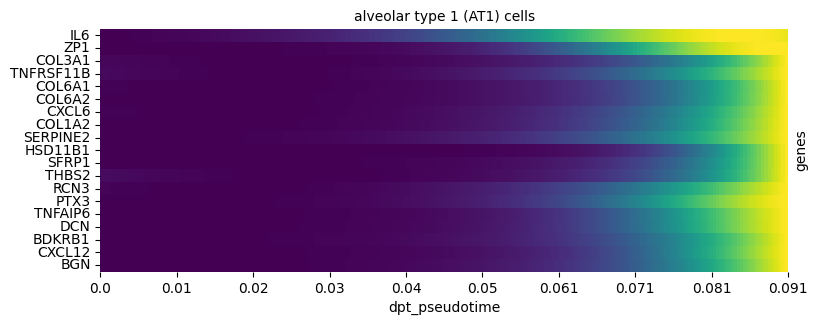

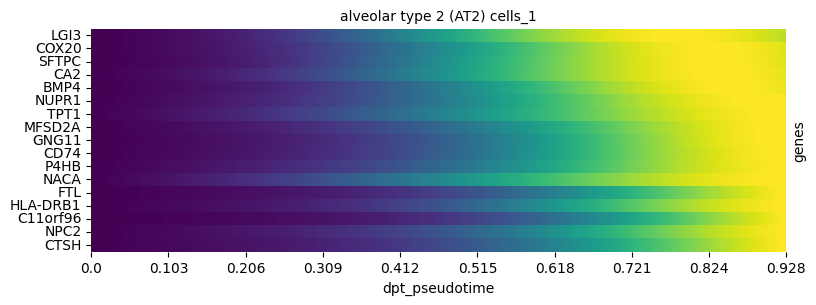

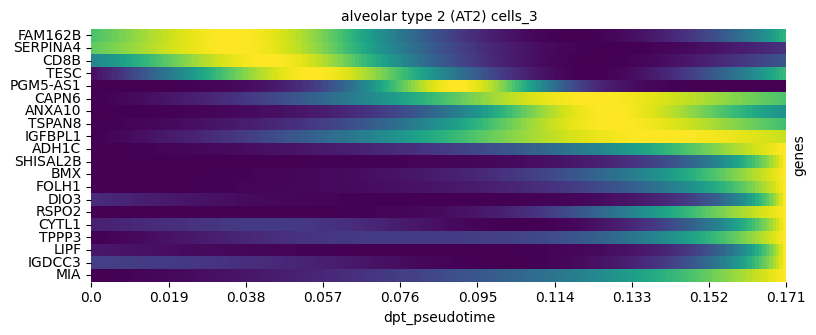

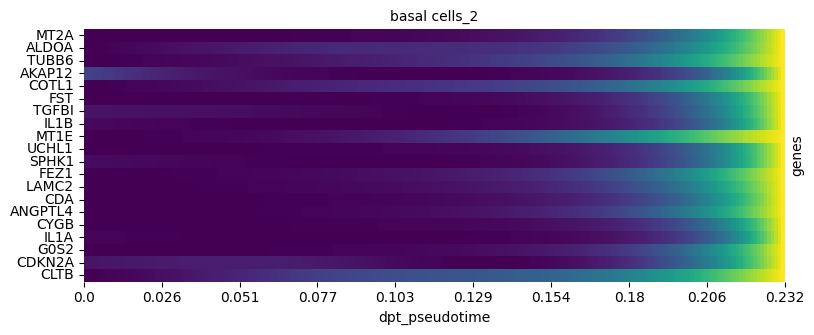

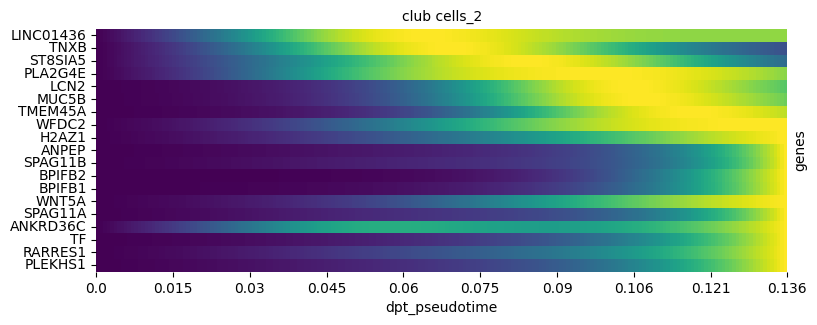

In [22]:
for (i,cell) in zip(range(0,9),selected_cells_asc):
    cr.pl.heatmap(
        g_asc.adata,
        model=cr.models.GAM(g_asc.adata),
        genes=df_list_asc[i].index[:].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

Computing trends using `1` core(s)


100%|██████████| 5/5 [00:02<00:00,  2.17gene/s]

    Finish (0:00:02)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:19<00:00,  3.84s/gene]

    Finish (0:00:19)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:03<00:00,  1.47gene/s]

    Finish (0:00:03)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:04<00:00,  1.01gene/s]

    Finish (0:00:05)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:02<00:00,  1.74gene/s]

    Finish (0:00:02)


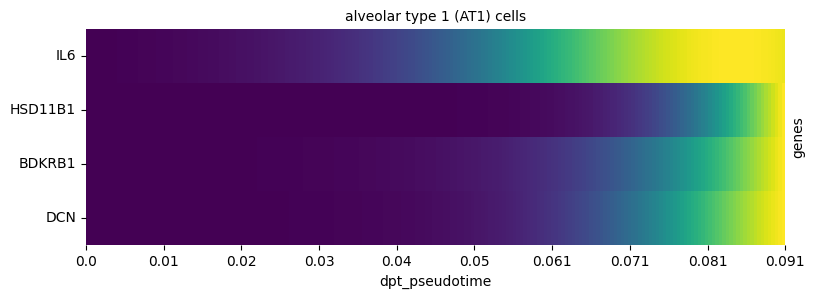

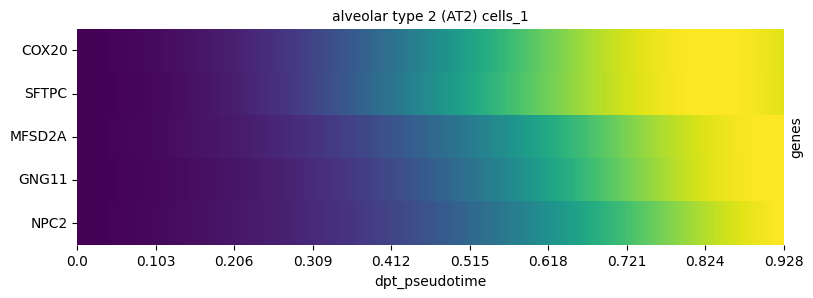

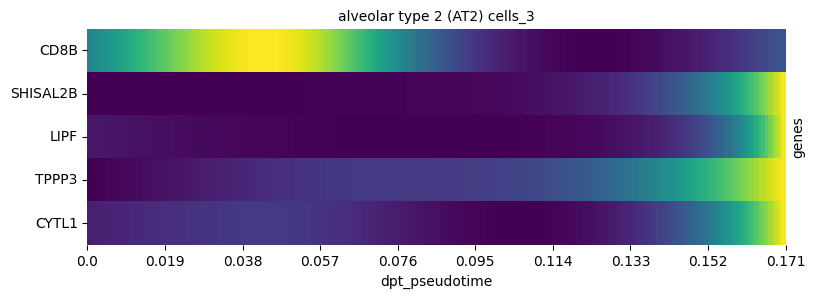

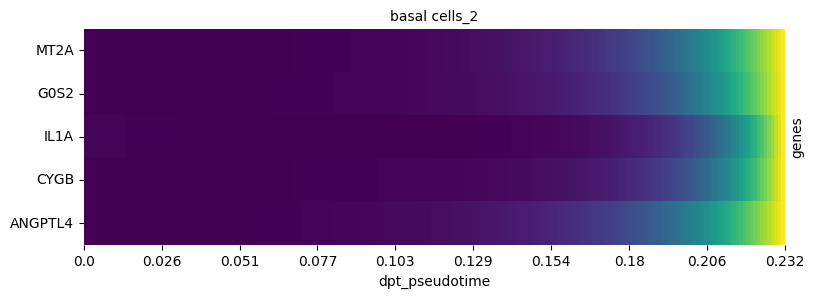

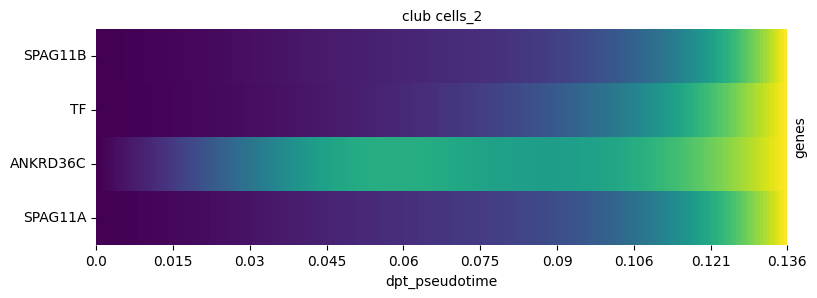

In [16]:
for (i,cell) in zip(range(0,9),selected_cells_asc):
    cr.pl.heatmap(
        g_asc.adata,
        model=cr.models.GAM(g_asc.adata),
        genes=df_list_asc[i].index[:5].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
        figsize=(10,3)
)

In [25]:
selected_cells_fsc =['alveolar type 2 (AT2) cells_2', 'club cells', 'basal cells','goblet cells', 'neuroendocrine cells_3',]
selected_cells_name_fsc = ['AT2_2',' CC', 'BC', 'GC', 'NEC']
df_list_fsc = []
for cell,name in zip(selected_cells_fsc,selected_cells_name_fsc):
    globals()['mono_drivers_' + str(name)] = g_fsc.compute_lineage_drivers(lineages=cell)
    df_list_fsc.append(globals()['mono_drivers_' + str(name)])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:10<00:00,  1.93gene/s]

    Finish (0:00:10)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:18<00:00,  1.07gene/s]

    Finish (0:00:18)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:04<00:00,  4.06gene/s]

    Finish (0:00:05)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:11<00:00,  1.77gene/s]

    Finish (0:00:11)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:06<00:00,  3.17gene/s]

    Finish (0:00:06)


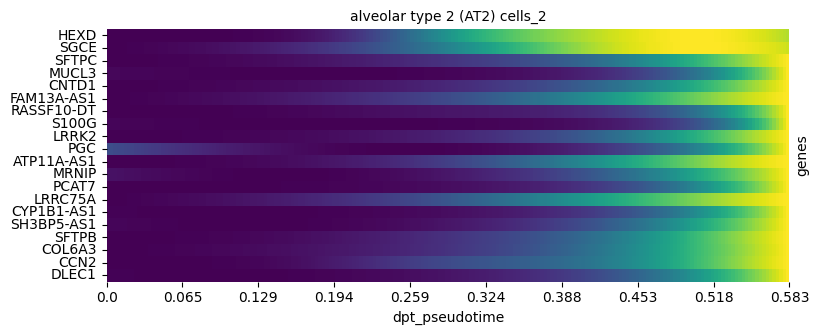

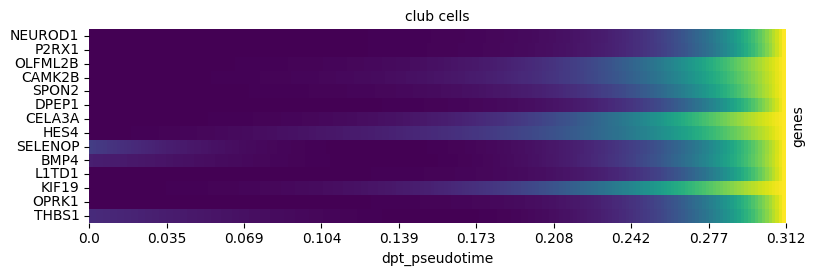

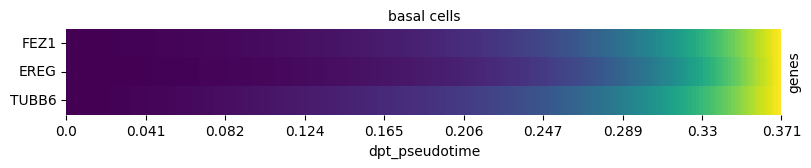

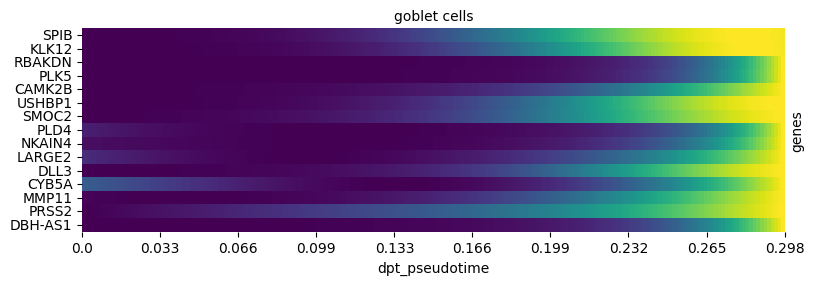

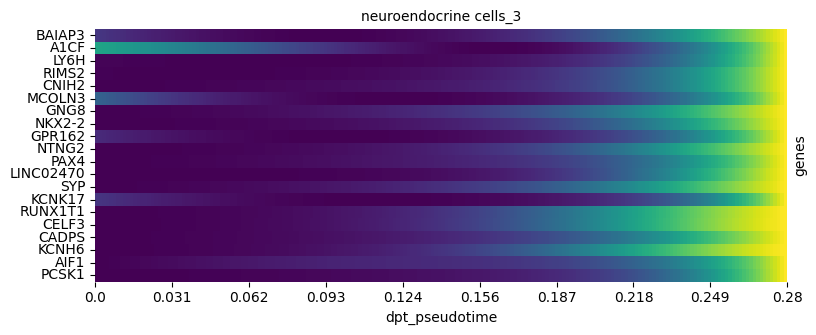

In [26]:
for (i,cell) in zip(range(0,9),selected_cells_fsc):
    cr.pl.heatmap(
        g_fsc.adata,
        model=cr.models.GAM(g_fsc.adata),
        genes=df_list_fsc[i].index[:20].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

In [27]:
selected_cells_psc = ['airway secretory cells_2', 'airway secretory cells_3','alveolar type 1 (AT1) cells', 'alveolar type 2 (AT2) cells', 
'neuroendocrine cells','stem cells_3' ]
selected_cells_name_psc = ['ASC_2',' ASC_3', 'AT1', 'AT2', 'NEC', 'SC_3']
df_list_psc = []
for cell,name in zip(selected_cells_psc,selected_cells_name_psc):
    globals()['mono_drivers_' + str(name)] = g_psc.compute_lineage_drivers(lineages=cell)
    df_list_psc.append(globals()['mono_drivers_' + str(name)])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:06<00:00,  3.09gene/s]

    Finish (0:00:06)
Computing trends using `1` core(s)



100%|██████████| 20/20 [00:07<00:00,  2.77gene/s]

    Finish (0:00:07)


Computing trends using `1` core(s)


 90%|█████████ | 18/20 [00:23<00:08,  4.22s/gene]

did not converge


100%|██████████| 20/20 [00:24<00:00,  1.22s/gene]

    Finish (0:00:24)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:12<00:00,  1.59gene/s]

    Finish (0:00:12)


Computing trends using `1` core(s)


 30%|███       | 6/20 [00:15<00:51,  3.69s/gene]

did not converge


 75%|███████▌  | 15/20 [00:29<00:17,  3.48s/gene]

did not converge


 85%|████████▌ | 17/20 [00:41<00:14,  4.93s/gene]

did not converge


100%|██████████| 20/20 [00:41<00:00,  2.09s/gene]

    Finish (0:00:41)


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:11<00:00,  1.71gene/s]

    Finish (0:00:11)


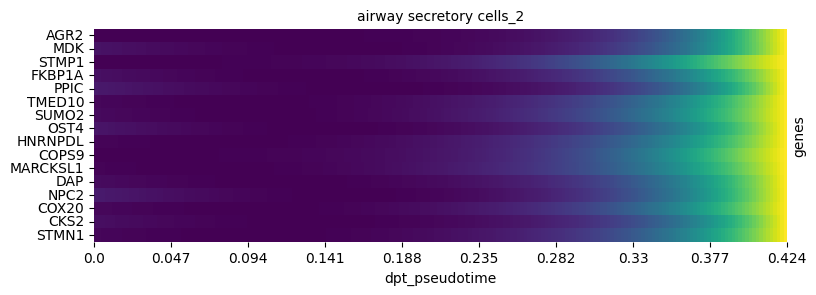

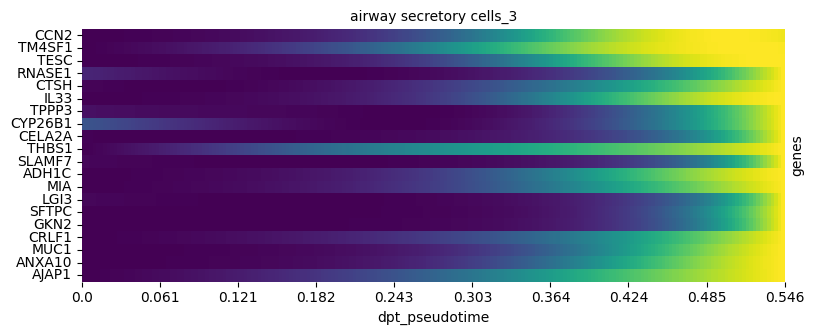

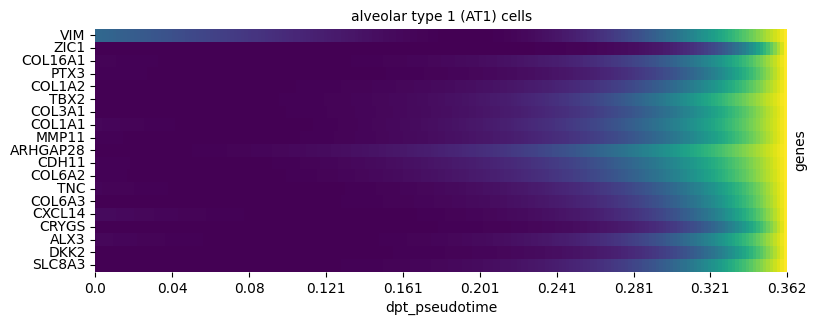

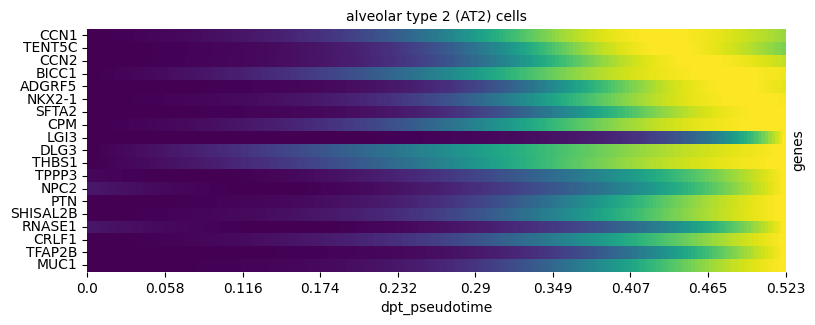

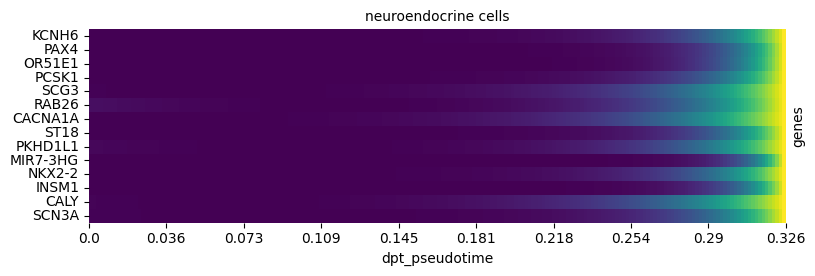

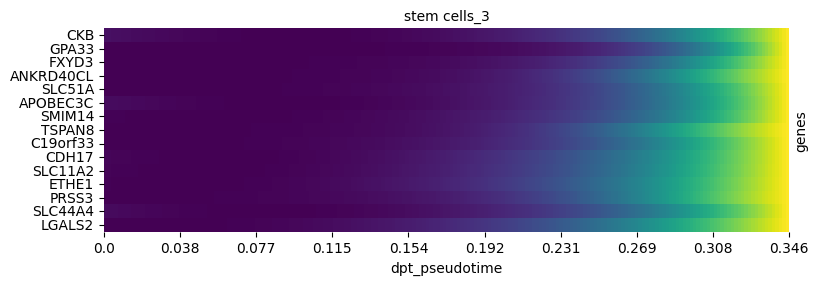

In [28]:
for (i,cell) in zip(range(0,9),selected_cells_psc):
    cr.pl.heatmap(
        g_psc.adata,
        model=cr.models.GAM(g_psc.adata),
        genes=df_list_psc[i].index[:20].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)